# Occupancy Detection

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

### loading the data and splitting into input and target

In [3]:
train_data = pd.read_csv("occupancy_data/datatraining.txt")
test_data = pd.read_csv("occupancy_data/datatest.txt")
test_data2 = pd.read_csv("occupancy_data/datatest2.txt")

data = pd.concat([train_data, test_data, test_data2])

### Classification using Gaussian Naive Bayes

###### Spliting the data 70% for training

In [4]:
train_split = 0.7
rows = data.shape[0]
train_rows = (int) (train_split*rows)
#splitting data
tmp_train = data[:train_rows]
tmp_test = data[train_rows:]
#splitting training into target and input 
target = tmp_train["Occupancy"]
in_data = tmp_train.drop(["date", "Occupancy"], axis=1)
#splitting training into target and input
target_test = tmp_test["Occupancy"]
in_test = tmp_test.drop(["date", "Occupancy"], axis=1)

# print in_data.head()
# print in_test.head()

#using the Gaussian Naive Bayes
gnb = GaussianNB()
y_pred = gnb.fit(in_data, target).predict(in_test)
num_rows = in_test.shape[0]
num_wrong = (target_test != y_pred).sum()
error = (num_wrong/num_rows)*100
print("Number of mislabeled points out of a total %d points : %d with error: %f %%" % (num_rows,num_wrong, error))

Number of mislabeled points out of a total 6169 points : 851 with error: 13.794780 %


###### Shuffling the data & Spliting 70% for training

In [5]:
train_split = 0.7
rows = data.shape[0]
train_rows = (int) (train_split*rows)
#shuffling the data
tmp = data
tmp = tmp.iloc[np.random.permutation(len(tmp))]
#splitting data
tmp_train = tmp[:train_rows]
tmp_test = tmp[train_rows:]
#splitting training into target and input 
target = tmp_train["Occupancy"]
in_data = tmp_train.drop(["date", "Occupancy"], axis=1)
#splitting training into target and input
target_test = tmp_test["Occupancy"]
in_test = tmp_test.drop(["date", "Occupancy"], axis=1)

# print in_data.head()
# print in_test.head()

#using the Gaussian Naive Bayes
gnb = GaussianNB()
y_pred = gnb.fit(in_data, target).predict(in_test)
num_rows = in_test.shape[0]
num_wrong = (target_test != y_pred).sum()
error = (num_wrong/num_rows)*100
print("Number of mislabeled points out of a total %d points : %d with error: %f %%" % (num_rows,num_wrong, error))

Number of mislabeled points out of a total 6169 points : 207 with error: 3.355487 %


###### Shuffling the data & Spliting 60% for training

In [6]:
train_split = 0.6
rows = data.shape[0]
train_rows = (int) (train_split*rows)
#shuffling the data
tmp = data
tmp = tmp.iloc[np.random.permutation(len(tmp))]
#splitting data
tmp_train = tmp[:train_rows]
tmp_test = tmp[train_rows:]
#splitting training into target and input 
target = tmp_train["Occupancy"]
in_data = tmp_train.drop(["date", "Occupancy"], axis=1)
#splitting training into target and input
target_test = tmp_test["Occupancy"]
in_test = tmp_test.drop(["date", "Occupancy"], axis=1)

# print in_data.head()
# print in_test.head()

#using the Gaussian Naive Bayes
gnb = GaussianNB()
y_pred = gnb.fit(in_data, target).predict(in_test)
num_rows = in_test.shape[0]
num_wrong = (target_test != y_pred).sum()
error = (num_wrong/num_rows)*100
print("Number of mislabeled points out of a total %d points : %d with error: %f %%" % (num_rows,num_wrong, error))

Number of mislabeled points out of a total 8224 points : 274 with error: 3.331712 %


###### Shuffling the data & Spliting 50% for training

In [7]:
train_split = 0.5
rows = data.shape[0]
train_rows = (int) (train_split*rows)
#shuffling the data
tmp = data
tmp = tmp.iloc[np.random.permutation(len(tmp))]
#splitting data
tmp_train = tmp[:train_rows]
tmp_test = tmp[train_rows:]
#splitting training into target and input 
target = tmp_train["Occupancy"]
in_data = tmp_train.drop(["date", "Occupancy"], axis=1)
#splitting training into target and input
target_test = tmp_test["Occupancy"]
in_test = tmp_test.drop(["date", "Occupancy"], axis=1)

# print in_data.head()
# print in_test.head()

#using the Gaussian Naive Bayes
gnb = GaussianNB()
y_pred = gnb.fit(in_data, target).predict(in_test)
num_rows = in_test.shape[0]
num_wrong = (target_test != y_pred).sum()
error = (num_wrong/num_rows)*100
print("Number of mislabeled points out of a total %d points : %d with error: %f %%" % (num_rows,num_wrong, error))

Number of mislabeled points out of a total 10280 points : 350 with error: 3.404669 %


###### Scaling the data (normalizing) ,then Shuffling it ,then Spliting it 70% for training

In [8]:
train_split = 0.7
rows = data.shape[0]
train_rows = (int) (train_split*rows)

tmp = data
#shuffling the data
tmp = tmp.iloc[np.random.permutation(len(tmp))]
#getting the target and the features
tmp_target = data["Occupancy"]
tmp = data.drop(["date", "Occupancy"], axis=1)
#scaling the data
min_max_scaler = preprocessing.MinMaxScaler()
tmp = min_max_scaler.fit_transform(tmp)
tmp = pd.DataFrame(tmp)
# print tmp.mean()
# print tmp.max()
# print tmp.min()
#splitting training into target and input
target = tmp_target[:train_rows]
in_data = tmp[:train_rows]
#splitting training into target and input
target_test = tmp_target[train_rows:]
in_test = tmp[train_rows:]

# print in_data.head()
# print in_test.head()

#using the Gaussian Naive Bayes
gnb = GaussianNB()
y_pred = gnb.fit(in_data, target).predict(in_test)
num_rows = in_test.shape[0]
num_wrong = (target_test != y_pred).sum()
error = (num_wrong/num_rows)*100
print("Number of mislabeled points out of a total %d points : %d with error: %f %%" % (num_rows,num_wrong, error))

Number of mislabeled points out of a total 6169 points : 876 with error: 14.200032 %


###### PCA


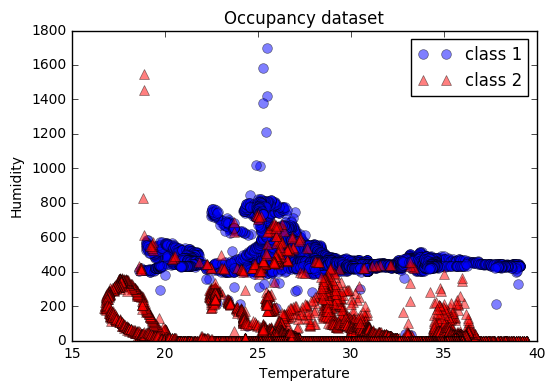

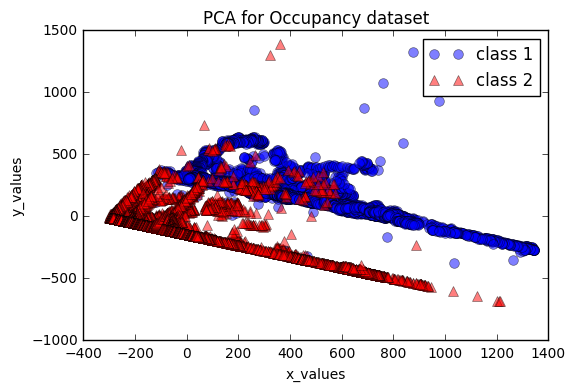

In [9]:
train_split = 0.7
rows = data.shape[0]
train_rows = (int) (train_split*rows)

target = data["Occupancy"]
tmp = data.drop(["date", "Occupancy"], axis=1)

#plotting the data
class_1 = [t for t, tar in zip(np.asarray(tmp), target) if tar == 1]
class_1 = np.asarray(class_1)
class_2 = [t for t, tar in zip(np.asarray(tmp), target) if tar == 0]
class_2 = np.asarray(class_2)

f_1 = 1
f_2 = 2

plt.figure(0)
plt.plot(class_1[:, f_1], class_1[:, f_2], 'o', markersize=7, color='blue', alpha=0.5, label='class 1')
plt.plot(class_2[:, f_1], class_2[:, f_2], '^', markersize=7, color='red', alpha=0.5, label='class 2')

plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend()
plt.title('Occupancy dataset')

# PCA
pca = PCA(n_components=2)
transf = pca.fit_transform(tmp)

class_1 = [t for t, tar in zip(transf, target) if tar == 1]
class_1 = np.asarray(class_1)
class_2 = [t for t, tar in zip(transf, target) if tar == 0]
class_2 = np.asarray(class_2)

plt.figure(1)
plt.plot(class_1[:, 0], class_1[:, 1], 'o', markersize=7, color='blue', alpha=0.5, label='class 1')
plt.plot(class_2[:, 0], class_2[:, 1], '^', markersize=7, color='red', alpha=0.5, label='class 2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('PCA for Occupancy dataset')

plt.show()


###### LDA

In [10]:
train_split = 0.7
rows = data.shape[0]
train_rows = (int) (train_split*rows)
#splitting data
tmp_train = data[:train_rows]
tmp_test = data[train_rows:]
#splitting training into target and input 
target = tmp_train["Occupancy"]
in_data = tmp_train.drop(["date", "Occupancy"], axis=1)
#splitting training into target and input
target_test = tmp_test["Occupancy"]
in_test = tmp_test.drop(["date", "Occupancy"], axis=1)

clf = LinearDiscriminantAnalysis(n_components=2)
lda = clf.fit(in_data, target)

x_lda = lda.transform(in_test)
y_lda = lda.predict(in_test)

num_rows = in_test.shape[0]
num_wrong = (target_test != y_lda).sum()
error = (num_wrong/num_rows)*100
print("Number of mislabeled points out of a total %d points : %d with error: %f %%" % (num_rows,num_wrong, error))

Number of mislabeled points out of a total 6169 points : 90 with error: 1.458907 %


###### KNN 

In [16]:
train_split = 0.7
rows = data.shape[0]
train_rows = (int) (train_split*rows)
#splitting data
tmp_train = data[:train_rows]
tmp_test = data[train_rows:]
#splitting training into target and input 
target = tmp_train["Occupancy"]
in_data = tmp_train.drop(["date", "Occupancy"], axis=1)
#splitting training into target and input
target_test = tmp_test["Occupancy"]
in_test = tmp_test.drop(["date", "Occupancy"], axis=1)

print("----------------------------------")
print("K = 3")
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(in_data, target)

y_pred = neigh.predict(in_test)
num_rows = in_test.shape[0]
num_wrong = (target_test != y_pred).sum()
error = (num_wrong/num_rows)*100
print("Number of mislabeled points out of a total %d points : %d with error: %f %%" % (num_rows,num_wrong, error))

print("----------------------------------")
print("K = 5")
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(in_data, target)

y_pred = neigh.predict(in_test)
num_rows = in_test.shape[0]
num_wrong = (target_test != y_pred).sum()
error = (num_wrong/num_rows)*100
print("Number of mislabeled points out of a total %d points : %d with error: %f %%" % (num_rows,num_wrong, error))

print("----------------------------------")
print("K = 8")
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(in_data, target)

y_pred = neigh.predict(in_test)
num_rows = in_test.shape[0]
num_wrong = (target_test != y_pred).sum()
error = (num_wrong/num_rows)*100
print("Number of mislabeled points out of a total %d points : %d with error: %f %%" % (num_rows,num_wrong, error))

print("----------------------------------")
print("K = 10")
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(in_data, target)

y_pred = neigh.predict(in_test)
num_rows = in_test.shape[0]
num_wrong = (target_test != y_pred).sum()
error = (num_wrong/num_rows)*100
print("Number of mislabeled points out of a total %d points : %d with error: %f %%" % (num_rows,num_wrong, error))

print("----------------------------------")
print("K = 20")
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(in_data, target)

y_pred = neigh.predict(in_test)
num_rows = in_test.shape[0]
num_wrong = (target_test != y_pred).sum()
error = (num_wrong/num_rows)*100
print("Number of mislabeled points out of a total %d points : %d with error: %f %%" % (num_rows,num_wrong, error))

----------------------------------
K = 3
Number of mislabeled points out of a total 6169 points : 146 with error: 2.366672 %
----------------------------------
K = 5
Number of mislabeled points out of a total 6169 points : 120 with error: 1.945210 %
----------------------------------
K = 8
Number of mislabeled points out of a total 6169 points : 92 with error: 1.491328 %
----------------------------------
K = 10
Number of mislabeled points out of a total 6169 points : 96 with error: 1.556168 %
----------------------------------
K = 20
Number of mislabeled points out of a total 6169 points : 82 with error: 1.329227 %


###### Neural Networks

In [38]:
train_split = 0.7
rows = data.shape[0]
train_rows = (int) (train_split*rows)
#splitting data
tmp_train = data[:train_rows]
tmp_test = data[train_rows:]
#splitting training into target and input 
target = np.asarray(tmp_train["Occupancy"])
in_data = np.asarray(tmp_train.drop(["date", "Occupancy"], axis=1))
#splitting training into target and input
target_test = np.asarray(tmp_test["Occupancy"])
in_test = np.asarray(tmp_test.drop(["date", "Occupancy"], axis=1))

print("---------------------------------------")
print("MLP 5-->20-->2")
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 20, 2), random_state=1)
clf.fit(in_data, target)

y_pred = clf.predict(in_test)
num_rows = in_test.shape[0]
num_wrong = (target_test != y_pred).sum()
error = (num_wrong/num_rows)*100
print("Number of mislabeled points out of a total %d points : %d with error: %f %%" % (num_rows,num_wrong, error))

print("---------------------------------------")
print("MLP 5-->50-->2")
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 50, 2), random_state=1)
clf.fit(in_data, target)

y_pred = clf.predict(in_test)
num_rows = in_test.shape[0]
num_wrong = (target_test != y_pred).sum()
error = (num_wrong/num_rows)*100
print("Number of mislabeled points out of a total %d points : %d with error: %f %%" % (num_rows,num_wrong, error))

print("---------------------------------------")
print("MLP 5-->100-->2")
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 100, 2), random_state=1)
clf.fit(in_data, target)

y_pred = clf.predict(in_test)
num_rows = in_test.shape[0]
num_wrong = (target_test != y_pred).sum()
error = (num_wrong/num_rows)*100
print("Number of mislabeled points out of a total %d points : %d with error: %f %%" % (num_rows,num_wrong, error))

print("---------------------------------------")
print("MLP 5-->100-->40-->2")
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 100, 40, 2), random_state=1)
clf.fit(in_data, target)

y_pred = clf.predict(in_test)
num_rows = in_test.shape[0]
num_wrong = (target_test != y_pred).sum()
error = (num_wrong/num_rows)*100
print("Number of mislabeled points out of a total %d points : %d with error: %f %%" % (num_rows,num_wrong, error))



---------------------------------------
MLP 5-->20-->2
Number of mislabeled points out of a total 6169 points : 1097 with error: 17.782461 %
---------------------------------------
MLP 5-->50-->2
Number of mislabeled points out of a total 6169 points : 1097 with error: 17.782461 %
---------------------------------------
MLP 5-->100-->2
Number of mislabeled points out of a total 6169 points : 326 with error: 5.284487 %
---------------------------------------
MLP 5-->100-->40-->2
Number of mislabeled points out of a total 6169 points : 28 with error: 0.453882 %
